In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [68]:
df = pd.read_csv('generaldf.csv')
df.head()

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State
0,1991,1,Larry Johnson,CHH,University of Nevada Las Vegas,22.1,250,"6'6.0""",USA,F,"Nov 28, 1954",Morganfield,Kentucky
1,1991,1,Larry Johnson,CHH,University of Nevada Las Vegas,22.1,250,"6'6.0""",USA,F,"Mar 14, 1969",Tyler,Texas
2,1991,2,Kenny Anderson,NJN,Georgia Institute of Technology,20.5,161,"6'0.0""",USA,PG,1970-10-09 00:00:00,Queens,New York
3,1991,3,Billy Owens,SAC,Syracuse University,21.9,225,"6'8.0""",USA,F,"May 1, 1969",Carlisle,Pennsylvania
4,1991,4,Dikembe Mutombo,DEN,Georgetown University,24.8,260,"7'2.0""",Congo DR,C,NaN,NaN,NaN


In [5]:
df.dtypes

Year                 int64
Pick                 int64
Name                object
Team                object
College             object
Age at Draft       float64
Weight at Draft      int64
Height at Draft     object
Country             object
Position            object
Date                object
City                object
State               object
Height Inches        int64
SeasonYear           int64
dtype: object

**We want to convert height to inches**

In [69]:
df['Height Inches'] = df['Height at Draft'].apply(lambda x: (int(x.split('\'')[0]) * 12) + 
                                                  (int(x.split('\'')[1].split('.')[0])))

**Preliminary basic dataframe of age, weight, height, with target variable of Usage Percentage and MPG of rookie year**

**We need to sort out the players with the same names**

In [76]:
df.loc[df['Name'] == 'Marcus Williams']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
889,2006,22,Marcus Williams,NJN,University of Connecticut,20.3,215,"6'3.0""",USA,SF,1985-12-03 00:00:00,Los Angeles,California,79
963,2007,33,Marcus Williams,SAS,University of Arizona,20.4,205,"6'7.0""",USA,SF,1986-11-18 00:00:00,Seattle,Washington,79


In [71]:
df.drop(df.index[890], inplace = True)

In [72]:
df = df.reset_index(drop = True)

In [73]:
df.drop(df.index[963], inplace = True)
df = df.reset_index(drop = True)

In [74]:
df.loc[(df['Name'] == 'Marcus Williams') & (df['Team'] == 'NJN'), ['Age at Draft', 'Weight at Draft',
                                                                  'Height at Draft']] = [20.3,215,'6\'3.0"']

In [138]:
df.loc[df['Name'] == 'Marcus Thornton']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear
1076,2009,43,Marcus Thornton,MIA,Louisiana State University,21.8,194,"6'4.0""",USA,SG,1987-06-05 00:00:00,Baton Rouge,Louisiana,76,2010
1438,2015,45,Marcus Thornton,BOS,College of William & Mary,22.2,177,"6'3.0""",USA,PG,"Feb 9, 1993",Upper Marlboro,Maryland,75,2016


In [77]:
df.drop(df.index[1095], inplace = True)
df = df.reset_index(drop = True)

In [78]:
df.drop(df.index[1459], inplace = True)
df = df.reset_index(drop = True)

In [79]:
df.loc[(df['Name'] == 'Marcus Thornton') & (df['Team'] == 'BOS'), ['Date','City','State']] = ['Feb 9, 1993',
                                                                                             'Upper Marlboro',
                                                                                             'Maryland']

In [139]:
df.loc[df['Name'] == 'Corey Brewer']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear
439,1998,51,Corey Brewer,MIA,University of Oklahoma,23.3,189,"6'2.0""",USA,PG,"Jan 2, 1975",West Memphis,Arkansas,74,1999
920,2007,7,Corey Brewer,MIN,University of Florida,21.1,185,"6'8.0""",USA,SF,"Mar 5, 1986",Portland,Tennessee,80,2008


In [81]:
df.drop(df.index[449], inplace = True)
df = df.reset_index(drop = True)

In [82]:
df.drop(df.index[935], inplace = True)
df = df.reset_index(drop = True)

In [83]:
df.loc[(df['Name'] == 'Corey Brewer') & (df['Team'] == 'MIA'), ['Date','City','State']] = ['Jan 2, 1975','West Memphis','Arkansas']

In [84]:
df.loc[(df['Name'] == 'Corey Brewer') & (df['Team'] == 'MIN'), ['Date','City','State']] = ['Mar 5, 1986','Portland','Tennessee']

In [85]:
df.loc[df['Name'] == 'Charles Smith']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
363,1997,26,Charles Smith,MIA,University of New Mexico,21.6,194,"6'4.0""",USA,G,"Nov 29, 1967",Washington,DC,76
364,1997,26,Charles Smith,MIA,University of New Mexico,21.6,194,"6'4.0""",USA,G,1975-08-22 00:00:00,Fort Worth,Texas,76
365,1997,26,Charles Smith,MIA,University of New Mexico,21.6,194,"6'4.0""",USA,G,"Jul 16, 1965",Bridgeport,Connecticut,76


In [86]:
df.drop(df.index[[363,364]], inplace = True)
df = df.reset_index(drop = True)

In [87]:
df.loc[df['Name'] == 'Ken Johnson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
617,2001,48,Ken Johnson,MIA,Ohio State University,23.2,227,"6'11.0""",USA,C,"Nov 7, 1962",Tuskegee,Alabama,83
618,2001,48,Ken Johnson,MIA,Ohio State University,23.2,227,"6'11.0""",USA,C,1978-02-01 00:00:00,Detroit,Michigan,83


In [88]:
df.drop(df.index[617], inplace = True)
df = df.reset_index(drop = True)

In [89]:
df.loc[df['Name'] == 'Glenn Robinson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
164,1994,1,Glenn Robinson,MIL,Purdue University,21.2,240,"6'7.0""",USA,SF/PF,1994-01-08 00:00:00,Gary,Indiana,79
165,1994,1,Glenn Robinson,MIL,Purdue University,21.2,240,"6'7.0""",USA,SF/PF,1973-01-10 00:00:00,Gary,Indiana,79


In [90]:
df.drop(df.index[164], inplace = True)
df = df.reset_index(drop = True)

In [91]:
df.loc[df['Name'] == 'Dee Brown']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
909,2006,46,Dee Brown,UTA,University of Illinois at Urbana-Champaign,21.6,179,"6'0.0""",USA,PG,"Nov 29, 1968",Jacksonville,Florida,72
910,2006,46,Dee Brown,UTA,University of Illinois at Urbana-Champaign,21.6,179,"6'0.0""",USA,PG,1984-08-17 00:00:00,Jackson,Mississippi,72


In [92]:
df.drop(df.index[909], inplace = True)
df = df.reset_index(drop = True)

In [93]:
df.loc[df['Name'] == 'Cedric Henderson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
380,1997,44,Cedric Henderson,CLE,University of Memphis,22.1,215,"6'7.0""",USA,SF/PF,"Oct 3, 1965",Marietta,Georgia,79
381,1997,44,Cedric Henderson,CLE,University of Memphis,22.1,215,"6'7.0""",USA,SF/PF,1975-03-11 00:00:00,Memphis,Tennessee,79


In [94]:
df.drop(df.index[380], inplace = True)
df = df.reset_index(drop = True)

In [95]:
df.loc[df['Name'] == 'Chris Smith']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
88,1992,34,Chris Smith,MIN,University of Connecticut,21.9,190,"6'3.0""",USA,G,1987-10-13 00:00:00,Millstone Township,New Jersey,75
89,1992,34,Chris Smith,MIN,University of Connecticut,21.9,190,"6'3.0""",USA,G,1970-05-17 00:00:00,Bridgeport,Connecticut,75


In [96]:
df.drop(df.index[88], inplace = True)
df = df.reset_index(drop = True)

In [97]:
df.loc[df['Name'] == 'David Vaughn']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
242,1995,25,David Vaughn,ORL,University of Memphis,22.0,240,"6'9.0""",USA,PF,1973-03-23 00:00:00,Tulsa,Oklahoma,81
243,1995,25,David Vaughn,ORL,University of Memphis,22.0,240,"6'9.0""",USA,PF,"Jun 4, 1952",Nashville,Tennessee,81


In [98]:
df.drop(df.index[243], inplace = True)
df = df.reset_index(drop = True)

In [99]:
df.loc[df['Name'] == 'Luke Jackson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
748,2004,10,Luke Jackson,CLE,University of Oregon,22.4,212,"6'7.0""",USA,SF,1981-11-06 00:00:00,Eugene,Oregon,79
749,2004,10,Luke Jackson,CLE,University of Oregon,22.4,212,"6'7.0""",USA,SF,"Oct 31, 1941",San Marcos,Texas,79


In [100]:
df.drop(df.index[749], inplace = True)
df = df.reset_index(drop = True)

In [101]:
df.loc[df['Name'] == 'Tony Mitchell']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
1319,2013,37,Tony Mitchell,DET,University of North Texas,21.0,236,"6'9.0""",USA,PF,1989-08-07 00:00:00,Swainsboro,Georgia,81
1320,2013,37,Tony Mitchell,DET,University of North Texas,21.0,236,"6'9.0""",USA,PF,1992-04-07 00:00:00,Milwaukee,Wisconsin,81


In [102]:
df.drop(df.index[1319], inplace = True)
df = df.reset_index(drop = True)

In [103]:
df.loc[df['Name'] == 'David Lee']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
827,2005,30,David Lee,NYK,University of Florida,21.9,230,"6'9.0""",USA,PF,"Mar 31, 1942",Modesto,California,81
828,2005,30,David Lee,NYK,University of Florida,21.9,230,"6'9.0""",USA,PF,1983-04-29 00:00:00,St. Louis,Missouri,81


In [104]:
df.drop(df.index[827], inplace = True)
df = df.reset_index(drop = True)

In [105]:
df.loc[df['Name'] == 'Mark Davis']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
265,1995,48,Mark Davis,MIN,Texas Tech University,21.9,210,"6'7.0""",USA,F,1973-04-26 00:00:00,Thibodaux,Louisiana,79
266,1995,48,Mark Davis,MIN,Texas Tech University,21.9,210,"6'7.0""",USA,F,"Jun 8, 1963",Chesapeake,Virginia,79


In [106]:
df.drop(df.index[266], inplace = True)
df = df.reset_index(drop = True)

In [107]:
df.loc[df['Name'] == 'Tim Hardaway']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
1302,2013,24,Tim Hardaway,NYK,University of Michigan,21.1,185,"6'6.0""",USA,SG,1992-03-16 00:00:00,Miami,Florida,78
1303,2013,24,Tim Hardaway,NYK,University of Michigan,21.1,185,"6'6.0""",USA,SG,"Sep 1, 1966",Chicago,Illinois,78


In [108]:
df.drop(df.index[1303], inplace = True)
df = df.reset_index(drop = True)

In [109]:
df.loc[df['Name'] == 'Gerald Henderson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
1049,2009,12,Gerald Henderson,CHA,Duke University,21.3,215,"6'5.0""",USA,SG,1987-12-09 00:00:00,Caldwell,New Jersey,77
1050,2009,12,Gerald Henderson,CHA,Duke University,21.3,215,"6'5.0""",USA,SG,"Jan 16, 1956",Richmond,Virginia,77


In [110]:
df.drop(df.index[1050], inplace = True)
df = df.reset_index(drop = True)

In [111]:
df.loc[df['Name'] == 'Larry Johnson']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
0,1991,1,Larry Johnson,CHH,University of Nevada Las Vegas,22.1,250,"6'6.0""",USA,F,"Nov 28, 1954",Morganfield,Kentucky,78
1,1991,1,Larry Johnson,CHH,University of Nevada Las Vegas,22.1,250,"6'6.0""",USA,F,"Mar 14, 1969",Tyler,Texas,78


In [112]:
df.drop(df.index[0], inplace = True)
df = df.reset_index(drop = True)

In [113]:
df.loc[df['Name'] == 'Mike Dunleavy']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
623,2002,3,Mike Dunleavy,GSW,Duke University,21.6,230,"6'9.0""",USA,SF,"Mar 21, 1954",Brooklyn,New York,81
624,2002,3,Mike Dunleavy,GSW,Duke University,21.6,230,"6'9.0""",USA,SF,1980-09-15 00:00:00,Fort Worth,Texas,81


In [114]:
df.drop(df.index[623], inplace = True)
df = df.reset_index(drop = True)

In [115]:
df.loc[df['Name'] == 'Glen Rice']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
1310,2013,35,Glen Rice,PHI,Georgia Institute of Technology,22.3,211,"6'6.0""",USA,SF,"May 28, 1967",Jacksonville,Arkansas,78
1311,2013,35,Glen Rice,PHI,Georgia Institute of Technology,22.3,211,"6'6.0""",USA,SF,1991-01-01 00:00:00,Miami,Florida,78


In [116]:
df.drop(df.index[1310], inplace = True)
df = df.reset_index(drop = True)

In [117]:
df.loc[df['Name'] == 'Bobby Jones']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
891,2006,37,Bobby Jones,MIN,University of Washington,22.2,211,"6'7.0""",USA,SF,1984-01-09 00:00:00,Compton,California,79
892,2006,37,Bobby Jones,MIN,University of Washington,22.2,211,"6'7.0""",USA,SF,"Dec 18, 1951",Charlotte,North Carolina,79


In [118]:
df.drop(df.index[892], inplace = True)
df = df.reset_index(drop = True)

In [119]:
df.loc[df['Name'] == 'Michael Smith']

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches
196,1994,35,Michael Smith,SAC,Providence College,22.0,230,"6'8.0""",USA,F,1972-03-28 00:00:00,Washington,DC,80
197,1994,35,Michael Smith,SAC,Providence College,22.0,230,"6'8.0""",USA,F,"May 19, 1965",Rochester,New York,80


In [120]:
df.drop(df.index[197], inplace = True)
df = df.reset_index(drop = True)

In [121]:
df['SeasonYear'] = df['Year'].apply(lambda x: x + 1)

In [122]:
df.to_csv('generaldf.csv', index = False)

In [123]:
df1 = df.loc[df['Country'] == 'USA'].copy()
df1.to_csv('generaldfusa.csv', index = False)

In [124]:
df2 = df.loc[df['Country'] != 'USA'].copy()
df2 = df2[['Year','Pick','Name','Team','College','Age at Draft','Weight at Draft','Height at Draft','Country',
          'Position','Date','Height Inches']].copy()
df2.to_csv('generaldfint.csv', index = False)

**Now we will merge NBA statistics to our basic dataframe**

In [125]:
br = pd.read_csv('/Users/mattlee/GA-Capstone-Project/brpergame.csv')
br.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Year
0,1,Alaa Abdelnaby\abdelal01,PF,22,POR,43,0,6.7,1.3,2.7,0.474,0.0,0.0,NaN,1.3,2.7,0.474,0.474,0.6,1.0,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf\abdulma02,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,0.4,1.5,0.240,5.9,13.6,0.432,0.425,1.3,1.5,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres\acresma01,C,28,ORL,68,0,19.3,1.6,3.1,0.509,0.0,0.0,0.333,1.6,3.1,0.512,0.512,1.0,1.5,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams\adamsmi01,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,2.5,8.5,0.296,6.0,13.0,0.459,0.453,7.0,8.0,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre\aguirma01,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1.0,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [126]:
br['Player'] = br['Player'].apply(lambda x: x.split('\\')[0].lower().title())

In [127]:
br['Player'] = br['Player'].apply(lambda x: x.replace('*',''))

In [ ]:
pd.set_option('display.max_columns',50)
pd.get_option('display.max_rows')
br['Name'] = br['Player']
br['SeasonYear'] = br['Year']
br['Team'] = br['Tm']

**We merge on SeasonYear, which is the first year of the player, so we get their rookie season minutes and games statistics**

In [129]:
df3 = pd.merge(df,br[['Name','MP','GS','G','SeasonYear']], on = ['Name','SeasonYear'], how = 'left')

In [130]:
df3.head()

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,MP,GS,G
0,1991,1,Larry Johnson,CHH,University of Nevada Las Vegas,22.1,250,"6'6.0""",USA,F,"Mar 14, 1969",Tyler,Texas,78,1992,37.2,77.0,82.0
1,1991,2,Kenny Anderson,NJN,Georgia Institute of Technology,20.5,161,"6'0.0""",USA,PG,1970-10-09 00:00:00,Queens,New York,72,1992,17.0,13.0,64.0
2,1991,3,Billy Owens,SAC,Syracuse University,21.9,225,"6'8.0""",USA,F,"May 1, 1969",Carlisle,Pennsylvania,80,1992,31.4,77.0,80.0
3,1991,4,Dikembe Mutombo,DEN,Georgetown University,24.8,260,"7'2.0""",Congo DR,C,NaN,NaN,NaN,86,1992,38.3,71.0,71.0
4,1991,5,Steve Smith,MIA,Michigan State University,22.0,200,"6'7.0""",USA,G,"Mar 31, 1969",Highland Park,Michigan,79,1992,29.6,59.0,61.0


In [131]:
nulls = df3.loc[df3['MP'].isnull()].copy()
nulls.to_csv('nulls.csv',index = False)

In [135]:
df3 = df3.loc[df3['MP'].notnull()].copy()

In [137]:
df3['Name'].value_counts()

Marcus Williams       5
Marcus Thornton       4
Terrence Rencher      3
Russ Smith            3
Dwight Powell         3
Luke Harangody        3
Jamie Feick           3
Javaris Crittenton    3
Courtney Alexander    3
Derrick Favors        3
K.J. Mcdaniels        3
Sean Singletary       3
Taurean Green         3
Joe Johnson           3
Luis Flores           3
Jordan Crawford       3
Howard Eisley         3
Jodie Meeks           3
Jason Sasser          3
Stephane Lasme        3
Eric Maynor           3
Adreian Payne         3
Nick Fazekas          3
Doron Lamb            3
Ryan Humphrey         3
Lester Hudson         3
John Thomas           3
Drew Gooden           3
Demetris Nichols      3
Mark Randall          3
                     ..
Tracy Mcgrady         1
Chris Mihm            1
Jason Maxiell         1
Luc Mbah A Moute      1
Marcus Banks          1
Ben Bentil            1
Jim Mcilvaine         1
Bryon Russell         1
Antonio Burks         1
Malcolm Brogdon       1
John Wallace    

In [136]:
df3.to_csv('rookiemin.csv', index = False)

**Some basic exploratory data analysis**

In [248]:
df3['Age at Draft'].describe()

count    1194.000000
mean       21.400586
std         1.397306
min        17.400000
25%        20.400000
50%        21.600000
75%        22.300000
max        27.200000
Name: Age at Draft, dtype: float64

(array([  21.,   98.,  159.,  211.,  373.,  254.,   63.,   12.,    2.,    1.]),
 array([ 17.4 ,  18.38,  19.36,  20.34,  21.32,  22.3 ,  23.28,  24.26,
         25.24,  26.22,  27.2 ]),
 <a list of 10 Patch objects>)

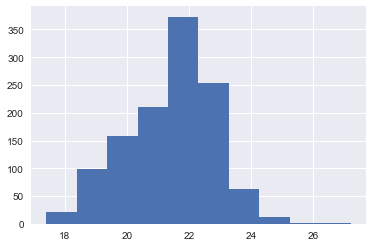

In [259]:
plt.hist(df3['Age at Draft'])

In [249]:
df3['Weight at Draft'].describe()

count    1194.000000
mean      218.489950
std        28.487764
min       149.000000
25%       198.000000
50%       218.000000
75%       238.000000
max       325.000000
Name: Weight at Draft, dtype: float64

(array([  25.,  105.,  235.,  246.,  271.,  185.,   87.,   24.,   10.,    6.]),
 array([ 149. ,  166.6,  184.2,  201.8,  219.4,  237. ,  254.6,  272.2,
         289.8,  307.4,  325. ]),
 <a list of 10 Patch objects>)

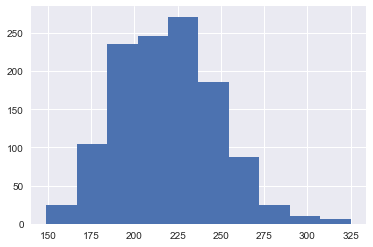

In [261]:
plt.hist(df3['Weight at Draft'])

In [250]:
df3['Height Inches'].describe()

count    1194.000000
mean       79.037688
std         3.553837
min        69.000000
25%        77.000000
50%        79.000000
75%        82.000000
max        91.000000
Name: Height Inches, dtype: float64

(array([  16.,   78.,  123.,  176.,  225.,  374.,  155.,   36.,    7.,    4.]),
 array([ 69. ,  71.2,  73.4,  75.6,  77.8,  80. ,  82.2,  84.4,  86.6,
         88.8,  91. ]),
 <a list of 10 Patch objects>)

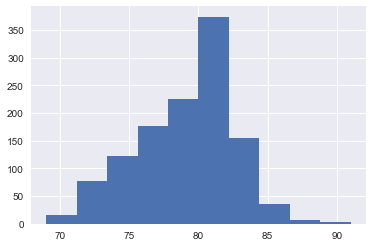

In [262]:
plt.hist(df3['Height Inches'])

In [251]:
df3['MP'].describe()

count    1194.000000
mean       15.181323
std         9.033314
min         0.000000
25%         8.200000
50%        13.100000
75%        20.700000
max        40.900000
Name: MP, dtype: float64

(array([  81.,  214.,  257.,  196.,  142.,   89.,   84.,   69.,   43.,   19.]),
 array([  0.  ,   4.09,   8.18,  12.27,  16.36,  20.45,  24.54,  28.63,
         32.72,  36.81,  40.9 ]),
 <a list of 10 Patch objects>)

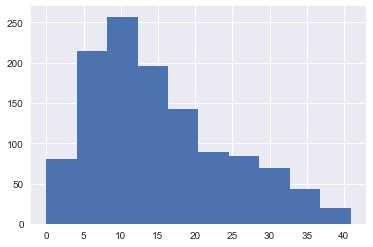

In [263]:
plt.hist(df3['MP'])

(array([   1.,    5.,   61.,  148.,  213.,  236.,  211.,  145.,  115.,   59.]),
 array([ 0.        ,  0.63953108,  1.27906216,  1.91859323,  2.55812431,
         3.19765539,  3.83718647,  4.47671755,  5.11624863,  5.7557797 ,
         6.39531078]),
 <a list of 10 Patch objects>)

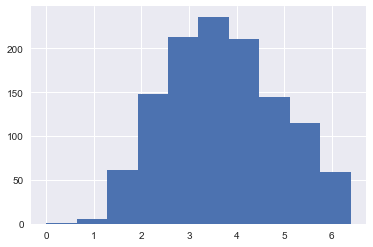

In [266]:
df3['MPsqrt'] = df3['MP'].apply(lambda x: np.sqrt(x))
plt.hist(df3['MPsqrt'])

In [252]:
df3['MP'].max()

40.899999999999999

**Highest average minutes played per game for a rookie is 41 minutes by Damon Stoudamire**

In [254]:
df3.loc[df3['MP'] == 40.899999999999999]

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,MP,GS,G
231,1995,7,Damon Stoudamire,TOR,University of Arizona,21.6,171,"5'10.0""",USA,PG,1973-09-03 00:00:00,Portland,Oregon,70,1996,40.9,70.0,70.0


In [255]:
df3['GS'].describe()

count    1194.000000
mean       14.940536
std        22.898273
min         0.000000
25%         0.000000
50%         2.000000
75%        21.000000
max        82.000000
Name: GS, dtype: float64

(array([ 759.,   97.,   70.,   49.,   36.,   41.,   31.,   29.,   30.,   52.]),
 array([  0. ,   8.2,  16.4,  24.6,  32.8,  41. ,  49.2,  57.4,  65.6,
         73.8,  82. ]),
 <a list of 10 Patch objects>)

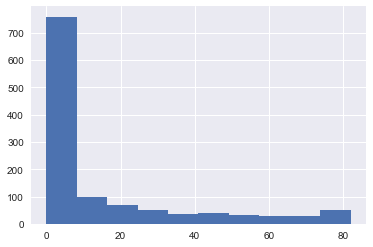

In [264]:
plt.hist(df3['GS'])

**Rookies that started all 82 games of their rookie season**

In [257]:
df3.loc[df3['GS'] == 82]

,Year,Pick,Name,Team,College,Age at Draft,Weight at Draft,Height at Draft,Country,Position,Date,City,State,Height Inches,SeasonYear,MP,GS,G
8,1991,9,Stacey Augmon,ATL,University of Nevada Las Vegas,22.7,192,"6'6.0""",USA,G,"Aug 1, 1968",Pasadena,California,78,1992,30.5,82.0,82.0
62,1992,5,Laphonso Ellis,DEN,University of Notre Dame,21.9,240,"6'8.0""",USA,F,1970-05-05 00:00:00,East St. Louis,Illinois,80,1993,33.5,82.0,82.0
66,1992,9,Clarence Weatherspoon,PHI,University of Southern Mississippi,21.6,240,"6'6.0""",USA,F,1970-09-08 00:00:00,Crawford,Mississippi,78,1993,32.4,82.0,82.0
114,1993,3,Anfernee Hardaway,GSW,University of Memphis,21.7,200,"6'7.0""",USA,SG,1971-07-18 00:00:00,Memphis,Tennessee,79,1994,36.8,82.0,82.0
225,1995,1,Joe Smith,GSW,University of Maryland,19.7,220,"6'10.0""",USA,PF,1975-07-26 00:00:00,Norfolk,Virginia,82,1996,34.4,82.0,82.0
349,1997,1,Tim Duncan,SAS,Wake Forest University,20.9,249,"7'0.0""",USA,C,"Apr 25, 1976",Christiansted,U.S. Virgin Islands,84,1998,39.1,82.0,82.0
716,2003,3,Carmelo Anthony,DEN,Syracuse University,18.9,233,"6'7.0""",USA,SF,1984-05-29 00:00:00,New York,New York,79,2004,36.5,82.0,82.0
772,2004,1,Dwight Howard,ORL,Highschool,18.3,240,"6'10.0""",USA,C,1985-12-08 00:00:00,Atlanta,Georgia,82,2005,32.6,82.0,82.0
780,2004,9,Andre Iguodala,PHI,University of Arizona,20.2,217,"6'7.0""",USA,SF,1984-01-28 00:00:00,Springfield,Illinois,79,2005,32.8,82.0,82.0
1030,2008,3,O.J. Mayo,MIN,University of Southern California,20.4,200,"6'4.0""",USA,PG/SG,1987-11-05 00:00:00,Huntington,West Virginia,76,2009,38.0,82.0,82.0


In [256]:
df3['G'].describe()

count    1194.000000
mean       46.883585
std        25.074688
min         1.000000
25%        25.000000
50%        49.000000
75%        70.000000
max        82.000000
Name: G, dtype: float64

(array([ 111.,   94.,   99.,   95.,  104.,  101.,  114.,  114.,  118.,  244.]),
 array([  1. ,   9.1,  17.2,  25.3,  33.4,  41.5,  49.6,  57.7,  65.8,
         73.9,  82. ]),
 <a list of 10 Patch objects>)

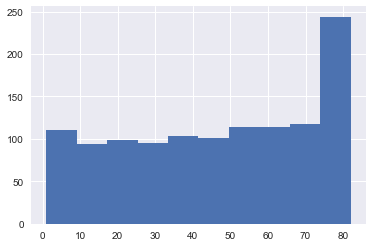

In [265]:
plt.hist(df3['G'])

In [140]:
br.columns

Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PS/G', u'Year', u'Name', u'SeasonYear', u'Team'],
      dtype='object')

In [141]:
brrook = br[['Player', 'Year','SeasonYear','Team','MP','GS','G']].copy()

In [151]:
rookiepg = pd.DataFrame(brrook.groupby(['Player'])['SeasonYear'].min()).reset_index()

**Here, we group by the minimum year of the player so we get their rookie season statistics**

In [148]:
rookiepgall = pd.DataFrame(br.groupby(['Player'])['SeasonYear'].min())

In [153]:
rookiepg = pd.merge(rookiepg,br[['Player','SeasonYear','Pos','Team','G','GS','MP','FG','FGA','FG%','3P',
                                '3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB',
                                'AST','STL','BLK','TOV','PF','PS/G']], on = ['Player','SeasonYear'], how = 'inner')

In [154]:
rookiepg.head()

,Player,SeasonYear,Pos,Team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,A.C. Green,1991,PF,LAL,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,3.0,5.9,0.507,0.486,2.7,3.7,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1
1,A.J. Bramlett,2000,C,CLE,8,0,7.6,0.5,2.6,0.190,0.0,0.0,NaN,0.5,2.6,0.190,0.190,0.0,0.0,NaN,1.5,1.3,2.8,0.0,0.1,0.0,0.4,1.6,1.0
2,A.J. English,1991,SG,WSB,70,12,20.6,3.6,8.2,0.439,0.0,0.4,0.097,3.5,7.7,0.458,0.441,1.6,2.2,0.707,0.9,1.2,2.1,2.5,0.4,0.2,1.6,1.8,8.8
3,A.J. Guyton,2001,PG,CHI,33,8,19.1,2.4,5.8,0.406,0.8,2.1,0.391,1.5,3.7,0.415,0.477,0.5,0.5,0.833,0.3,0.8,1.1,1.9,0.3,0.2,0.7,1.1,6.0
4,A.J. Hammons,2017,C,DAL,22,0,7.4,0.8,1.9,0.405,0.2,0.5,0.500,0.5,1.5,0.375,0.464,0.4,0.9,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2


In [162]:
rookiepg['Name'] = rookiepg['Player']

**We will use this CSV as the rookie season statistics if needed**

In [163]:
rookiepg.to_csv('rookieyear.csv', index = False)

In [161]:
df.columns

Index([u'Year', u'Pick', u'Name', u'Team', u'College', u'Age at Draft',
       u'Weight at Draft', u'Height at Draft', u'Country', u'Position',
       u'Date', u'City', u'State', u'Height Inches', u'SeasonYear'],
      dtype='object')

In [160]:
rookiepg.sort_values('GS',ascending = False)

,Player,SeasonYear,Pos,Team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
2207,Stacey Augmon,1992,SG,ATL,82,82,30.5,5.4,11.0,0.489,0.0,0.1,0.167,5.4,10.9,0.492,0.490,2.6,3.9,0.666,2.3,2.8,5.1,2.5,1.5,0.3,2.2,2.0,13.3
334,Carmelo Anthony,2004,SF,DEN,82,82,36.5,7.6,17.9,0.426,0.8,2.6,0.322,6.8,15.3,0.444,0.449,5.0,6.4,0.777,2.2,3.8,6.1,2.8,1.2,0.5,3.0,2.7,21.0
2319,Tim Hardaway,1991,PG,GSW,82,82,39.2,9.0,18.9,0.476,1.2,3.1,0.385,7.8,15.8,0.494,0.508,3.7,4.6,0.803,1.1,3.0,4.0,9.7,2.6,0.1,3.3,2.8,22.9
1909,Pooh Richardson,1991,PG,MIN,82,82,38.5,7.7,16.5,0.470,0.5,1.6,0.328,7.2,14.9,0.485,0.486,1.1,2.0,0.539,1.0,2.5,3.5,9.0,1.6,0.2,2.1,1.4,17.1
1227,Joe Smith,1996,PF,GSW,82,82,34.4,5.7,12.5,0.458,0.1,0.3,0.357,5.6,12.1,0.461,0.463,3.7,4.8,0.773,3.7,5.1,8.7,1.0,1.0,1.6,1.7,2.7,15.3
1252,John Paxson,1991,PG,CHI,82,82,24.0,3.9,7.0,0.548,0.5,1.2,0.438,3.4,5.9,0.571,0.585,0.4,0.5,0.829,0.2,0.9,1.1,3.6,0.8,0.0,0.8,1.7,8.7
1257,John Stockton,1991,PG,UTA,82,82,37.8,6.0,11.9,0.507,0.7,2.0,0.345,5.3,9.9,0.541,0.537,4.4,5.3,0.836,0.6,2.3,2.9,14.2,2.9,0.2,3.6,2.8,17.2
1347,Karl Malone,1991,PF,UTA,82,82,40.3,10.3,19.6,0.527,0.0,0.2,0.286,10.3,19.4,0.529,0.528,8.3,10.8,0.770,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0
1348,Karl-Anthony Towns,2016,C,MIN,82,82,32.0,7.6,14.1,0.542,0.4,1.1,0.341,7.3,13.0,0.559,0.555,2.7,3.4,0.811,2.8,7.7,10.5,2.0,0.7,1.7,2.2,3.0,18.3
1855,Otis Thorpe,1991,PF,HOU,82,82,37.1,6.7,12.0,0.556,0.0,0.1,0.429,6.7,12.0,0.557,0.557,4.1,5.9,0.696,3.5,6.8,10.3,2.4,0.9,0.2,2.6,3.4,17.5


In [164]:
rookiepg = pd.merge(rookiepg,df[['Name','SeasonYear','Age at Draft','Weight at Draft','Height Inches',
                                'Country','Date','City','State']], on = ['Name','SeasonYear'], how = 'inner')

In [168]:
rookiepg.to_csv('rookieyearphysical.csv',index = False)

**Just to see if a certain state produces players that play more minutes**

In [170]:
rookiepg['State'].value_counts().head()

California      131
New York         72
Illinois         57
Georgia          56
Pennsylvania     47
Name: State, dtype: int64

In [176]:
rookiepg.loc[rookiepg['State'] == 'California',['MP']].mean()

MP    15.379389
dtype: float64

In [177]:
rookiepg.loc[rookiepg['State'] == 'New York',['MP']].mean()

MP    16.175
dtype: float64

In [178]:
rookiepg.loc[rookiepg['State'] == 'Illinois',['MP']].mean()

MP    16.733333
dtype: float64

In [179]:
rookiepg.loc[rookiepg['State'] == 'Georgia',['MP']].mean()

MP    14.080357
dtype: float64

In [180]:
rookiepg.loc[rookiepg['State'] == 'Pennsylvania',['MP']].mean()

MP    16.404255
dtype: float64